In [1]:
import requests
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup

### Data Source - Web Scraping


In [3]:
url = 'https://covid19.ncdc.gov.ng/'
response = requests.get(url)
print(response.status_code)


200


In [4]:
soup = BeautifulSoup(response.text,"html.parser")

In [8]:
table = soup.findAll('table',{"id":"custom1"})[0]
values =[]

In [11]:
tr = table.findAll(['tr'])

In [13]:
csvFile = open("covidnig.csv",'wt',newline='',encoding='utf-8')
writer = csv.writer(csvFile)  
try:   
        for cell in tr:
            th = cell.find_all('th')
            th_data = [col.text.strip('\n') for col in th]
            td = cell.find_all('td')
            row = [i.text.replace('\n','') for i in td]
            writer.writerow(th_data+row)      
        
finally:   
    csvFile.close()

In [2]:
df = pd.read_csv('covidnig.csv')

In [3]:
df.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"24,952","1,282","23,439",231
1,FCT,"8,424","1,953","6,383",88
2,Plateau,"3,997",77,"3,886",34
3,Kaduna,"3,867",491,"3,329",47
4,Oyo,"3,760",343,"3,372",45


### Rename column

In [4]:
df.columns = ['states', 'cases_lab_confirmed', 'cases_on_admission', 'discharged', 'deaths']

In [5]:
df.head()

,states,cases_lab_confirmed,cases_on_admission,discharged,deaths
0,Lagos,"24,952","1,282","23,439",231
1,FCT,"8,424","1,953","6,383",88
2,Plateau,"3,997",77,"3,886",34
3,Kaduna,"3,867",491,"3,329",47
4,Oyo,"3,760",343,"3,372",45


### Analyse NCDC Covid Data

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')


#### Understand the data
TO-DO
Check the number of rows and columns present in the data using the shape attribute.

In [7]:
df.shape

(37, 5)

There are 37 states including Federal capital territory

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   states               37 non-null     object
 1   cases_lab_confirmed  37 non-null     object
 2   cases_on_admission   37 non-null     object
 3   discharged           37 non-null     object
 4   deaths               37 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.6+ KB


### Clean the data

From the data information, you will observe that the columns with the number of cases confirmed, cases on admission and discharged are objects. Your task is to convert to appropriate data type

In [9]:
df = df.replace(',','', regex=True)

In [10]:
a = df[['cases_lab_confirmed', 'cases_on_admission', 'discharged']].columns
df[a] = df[a].apply(pd.to_numeric,errors='coerce')

In [11]:
df.head()

,states,cases_lab_confirmed,cases_on_admission,discharged,deaths
0,Lagos,24952,1282,23439,231
1,FCT,8424,1953,6383,88
2,Plateau,3997,77,3886,34
3,Kaduna,3867,491,3329,47
4,Oyo,3760,343,3372,45


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   states               37 non-null     object
 1   cases_lab_confirmed  37 non-null     int64 
 2   cases_on_admission   37 non-null     int64 
 3   discharged           37 non-null     int64 
 4   deaths               37 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.6+ KB


From the data information, the data types looks good.

To-Do - Generate a plot that shows the Top 10 states in terms of Confirmed Covid cases by Laboratory test

Text(0.5, 0, 'Confirmed Cases by Laboratory')

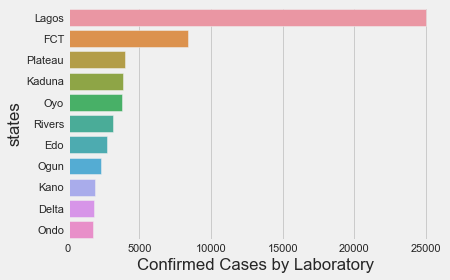

In [13]:
ax = sns.barplot(x='cases_lab_confirmed', y='states', data=df[['states', 'cases_lab_confirmed']].loc[:10])
ax.set_xlabel('Confirmed Cases by Laboratory')

To-Do - Generate a plot that shows the Top 10 states in terms of Discharged Covid cases. 
Hint - Sort the values

Text(0.5, 0, 'Discharged Cases')

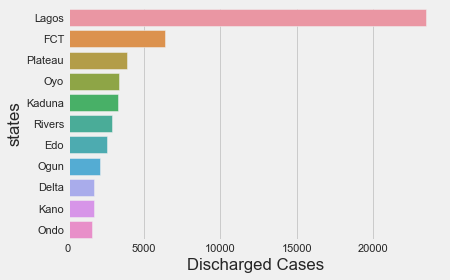

In [14]:
ax = sns.barplot(x='discharged', y='states', data=df[['states', 'discharged']].sort_values(by=['discharged'],ascending=False).loc[:10])
ax.set_xlabel('Discharged Cases')


Cases on admission represents the active cases in each states. Let's determine the states with high values of active cases. 
<br>
To-Do: Plot the top 10 active cases

Text(0.5, 0, 'Top 10 Active Cases')

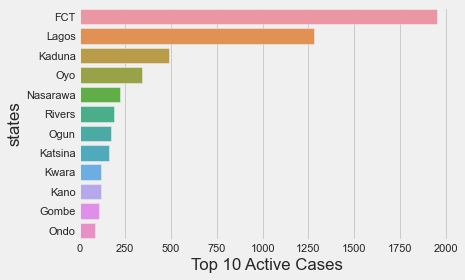

In [19]:
ax = sns.barplot(x='cases_on_admission', y='states', data=df[['states', 'cases_on_admission']].sort_values(by=['cases_on_admission'],ascending=False).loc[:10])
ax.set_xlabel('Top 10 Active Cases')

From the chart above, you will discover that FCT has the highest number of active cases, even though Lagos has the highest number of confirmed cases. 

### Correlation of Data

Task - Here you will plot the correlation matrix of the data. This can be done with the Seaborn visualization library

<AxesSubplot:>

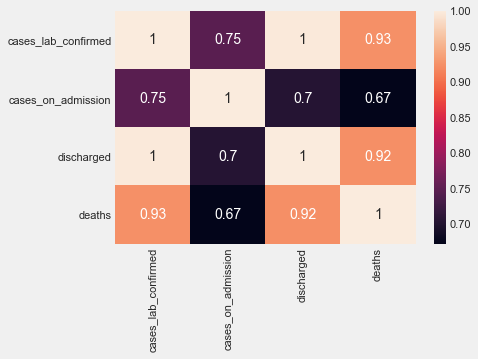

In [20]:
corr = df.corr()
sns.heatmap(corr, annot=True)

#### Cases Confirmed vs Death
Using a Seaborn visualization `regplot` you can plot and determine the relationship between two variables. 

In [21]:
x = df['cases_lab_confirmed']
y = df['deaths']

<AxesSubplot:xlabel='cases_lab_confirmed', ylabel='deaths'>

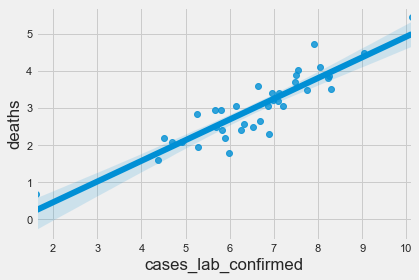

In [22]:
sns.regplot(np.log(x), np.log(y))

From the chart above, the confirmed cases has a positive relationship with the number of deaths. i.e the more cases are confirmed, the more the death cases. 

### Analyse the Covid Data with External Data

Here, you are provided with external datasets for each states. Your task here will be to understand the relationships between the external features and the features in the Covid datasets. 
<br>
Your first task is to prepare the datasets for analysis by cleaning the data.  

In [23]:
#Read the data
df2 = pd.read_csv('external_data.csv')
budget = pd.read_csv('Budget data.csv')

In [24]:
df2.head()

,states,region,BCG Vaccination(%),Tuberculosis_cases,Smoking_prevalence(%),HIV_prevalence(%),Health_facilities,Age above 65(%),Population,Population_density,Literacy_rate(%),Unemployment(%),GDP_per_capita
0,FCT,North Central,63,966,5.1,3.9,450,0.6,"3,564,126",469,78.8,24.4,3285.0
1,Plateau,North Central,62,NaN,6.8,3.1,1011,2.6,"4,200,442",155,63.7,29.8,1587.0
2,Kwara,North Central,70,"2,726",2.7,2.4,750,2.3,"3,192,893",89,69.7,21.1,1585.0
3,Nassarawa,North Central,51,"13,079",11.5,4.4,946,2.1,"2,523,395",88,59.2,27.4,1588.0
4,Niger,North Central,36,621,8.0,2.0,1994,1.9,"5,556,247",NaN,22.9,NaN,NaN


### Data Cleaning

In [25]:
#Remove the comma in the datasets, and convert the data type to Integer
df2 = df2.replace(',','', regex=True)

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   states                 37 non-null     object 
 1   region                 37 non-null     object 
 2   BCG Vaccination(%)     37 non-null     int64  
 3   Tuberculosis_cases     26 non-null     object 
 4   Smoking_prevalence(%)  37 non-null     float64
 5   HIV_prevalence(%)      37 non-null     float64
 6   Health_facilities      37 non-null     int64  
 7   Age above 65(%)        37 non-null     float64
 8   Population             37 non-null     object 
 9   Population_density     36 non-null     object 
 10  Literacy_rate(%)       37 non-null     float64
 11  Unemployment(%)        36 non-null     float64
 12  GDP_per_capita         35 non-null     float64
dtypes: float64(6), int64(2), object(5)
memory usage: 3.9+ KB


In [27]:
# Convert to numeric
b = df2[['Tuberculosis_cases', 'Population', 'Population_density']].columns
df2[b] = df2[b].apply(pd.to_numeric,errors='coerce')


In [28]:
df2.head()

,states,region,BCG Vaccination(%),Tuberculosis_cases,Smoking_prevalence(%),HIV_prevalence(%),Health_facilities,Age above 65(%),Population,Population_density,Literacy_rate(%),Unemployment(%),GDP_per_capita
0,FCT,North Central,63,966.0,5.1,3.9,450,0.6,3564126,469.0,78.8,24.4,3285.0
1,Plateau,North Central,62,NaN,6.8,3.1,1011,2.6,4200442,155.0,63.7,29.8,1587.0
2,Kwara,North Central,70,2726.0,2.7,2.4,750,2.3,3192893,89.0,69.7,21.1,1585.0
3,Nassarawa,North Central,51,13079.0,11.5,4.4,946,2.1,2523395,88.0,59.2,27.4,1588.0
4,Niger,North Central,36,621.0,8.0,2.0,1994,1.9,5556247,NaN,22.9,NaN,NaN


In [29]:
# Fill missing data with mean
df2 = df2.fillna(df2.mean())

In [30]:
df2.head()

,states,region,BCG Vaccination(%),Tuberculosis_cases,Smoking_prevalence(%),HIV_prevalence(%),Health_facilities,Age above 65(%),Population,Population_density,Literacy_rate(%),Unemployment(%),GDP_per_capita
0,FCT,North Central,63,966.0,5.1,3.9,450,0.6,3564126,469.000000,78.8,24.400,3285.000000
1,Plateau,North Central,62,2296.4,6.8,3.1,1011,2.6,4200442,155.000000,63.7,29.800,1587.000000
2,Kwara,North Central,70,2726.0,2.7,2.4,750,2.3,3192893,89.000000,69.7,21.100,1585.000000
3,Nassarawa,North Central,51,13079.0,11.5,4.4,946,2.1,2523395,88.000000,59.2,27.400,1588.000000
4,Niger,North Central,36,621.0,8.0,2.0,1994,1.9,5556247,430.527778,22.9,23.525,2024.685714


#### Join the datasets together.
<br>
Hint: You can combine the data across the common column(states)

In [31]:
dfmerge = pd.merge(df, df2, how='outer', on=['states'])
dfcovid = pd.merge(dfmerge, budget, how='outer', on=['states'])

In [32]:
dfcovid.head()

,states,cases_lab_confirmed,cases_on_admission,discharged,deaths,region,BCG Vaccination(%),Tuberculosis_cases,Smoking_prevalence(%),HIV_prevalence(%),Health_facilities,Age above 65(%),Population,Population_density,Literacy_rate(%),Unemployment(%),GDP_per_capita,Initial_budget (Bn),Revised_budget (Bn)
0,Lagos,24952.0,1282.0,23439.0,231.0,South West,91.0,19933.0,19.6,2.8,1587.0,1.7,12550598.0,3419.0,96.3,14.6,4333.0,1680.00,920.5
1,FCT,8424.0,1953.0,6383.0,88.0,North Central,63.0,966.0,5.1,3.9,450.0,0.6,3564126.0,469.0,78.8,24.4,3285.0,278.78,199.0
2,Plateau,3997.0,77.0,3886.0,34.0,North Central,62.0,2296.4,6.8,3.1,1011.0,2.6,4200442.0,155.0,63.7,29.8,1587.0,177.30,122.0
3,Kaduna,3867.0,491.0,3329.0,47.0,North West,46.0,2600.0,9.5,3.1,1678.0,2.1,8252366.0,194.0,47.3,26.8,1666.0,259.25,223.6
4,Oyo,3760.0,343.0,3372.0,45.0,South West,79.0,2296.4,23.7,2.5,1251.0,2.7,7840864.0,296.0,80.3,10.3,2666.0,213.00,174.0


### Calculate cases mortality rate

In [33]:
#No of deaths per total population
dfcovid['CMR'] = ((dfcovid['deaths']/dfcovid['Population'])*1000000)

In [34]:
dfcovid.head()

,states,cases_lab_confirmed,cases_on_admission,discharged,deaths,region,BCG Vaccination(%),Tuberculosis_cases,Smoking_prevalence(%),HIV_prevalence(%),Health_facilities,Age above 65(%),Population,Population_density,Literacy_rate(%),Unemployment(%),GDP_per_capita,Initial_budget (Bn),Revised_budget (Bn),CMR
0,Lagos,24952.0,1282.0,23439.0,231.0,South West,91.0,19933.0,19.6,2.8,1587.0,1.7,12550598.0,3419.0,96.3,14.6,4333.0,1680.00,920.5,18.405497
1,FCT,8424.0,1953.0,6383.0,88.0,North Central,63.0,966.0,5.1,3.9,450.0,0.6,3564126.0,469.0,78.8,24.4,3285.0,278.78,199.0,24.690485
2,Plateau,3997.0,77.0,3886.0,34.0,North Central,62.0,2296.4,6.8,3.1,1011.0,2.6,4200442.0,155.0,63.7,29.8,1587.0,177.30,122.0,8.094386
3,Kaduna,3867.0,491.0,3329.0,47.0,North West,46.0,2600.0,9.5,3.1,1678.0,2.1,8252366.0,194.0,47.3,26.8,1666.0,259.25,223.6,5.695336
4,Oyo,3760.0,343.0,3372.0,45.0,South West,79.0,2296.4,23.7,2.5,1251.0,2.7,7840864.0,296.0,80.3,10.3,2666.0,213.00,174.0,5.739163


In [35]:
corr= dfcovid.corr()
corr

,cases_lab_confirmed,cases_on_admission,discharged,deaths,BCG Vaccination(%),Tuberculosis_cases,Smoking_prevalence(%),HIV_prevalence(%),Health_facilities,Age above 65(%),Population,Population_density,Literacy_rate(%),Unemployment(%),GDP_per_capita,Initial_budget (Bn),Revised_budget (Bn),CMR
cases_lab_confirmed,1.000000,0.747844,0.997962,0.925389,0.300565,0.899593,0.126756,0.017644,0.132027,-0.333165,0.539555,0.821565,0.258631,-0.197247,0.527134,0.771287,0.919186,0.574777
cases_on_admission,0.747844,1.000000,0.704042,0.671495,0.169833,0.482002,-0.061334,0.077496,-0.003991,-0.627672,0.273312,0.455708,0.168316,-0.118698,0.419788,0.442218,0.562954,0.648286
discharged,0.997962,0.704042,1.000000,0.923976,0.305164,0.916817,0.141582,0.011823,0.142702,-0.296716,0.550559,0.835614,0.260149,-0.200170,0.522366,0.782668,0.929029,0.550118
deaths,0.925389,0.671495,0.923976,1.000000,0.288442,0.775507,0.118301,-0.024847,0.025190,-0.230817,0.546830,0.725654,0.276628,-0.131251,0.606318,0.698323,0.856445,0.761054
BCG Vaccination(%),0.300565,0.169833,0.305164,0.288442,1.000000,0.174379,0.559447,0.408817,-0.123261,0.452348,-0.052795,0.455117,0.903901,-0.201276,0.613047,0.264666,0.245736,0.295170
Tuberculosis_cases,0.899593,0.482002,0.916817,0.775507,0.174379,1.000000,0.105755,-0.014692,0.219486,-0.184078,0.357496,0.656467,0.123950,-0.221745,0.266621,0.906485,0.892469,0.291459
Smoking_prevalence(%),0.126756,-0.061334,0.141582,0.118301,0.559447,0.105755,1.000000,0.202463,-0.218996,0.569425,-0.077772,0.276101,0.614868,-0.138413,0.543098,0.224496,0.247830,0.069283
HIV_prevalence(%),0.017644,0.077496,0.011823,-0.024847,0.408817,-0.014692,0.202463,1.000000,-0.173304,0.082066,-0.192695,0.110460,0.591045,0.409911,0.451548,0.131166,0.107066,0.027948
Health_facilities,0.132027,-0.003991,0.142702,0.025190,-0.123261,0.219486,-0.218996,-0.173304,1.000000,-0.127706,0.464063,0.144584,-0.226530,-0.390697,-0.191332,0.151160,0.155534,-0.313164
Age above 65(%),-0.333165,-0.627672,-0.296716,-0.230817,0.452348,-0.184078,0.569425,0.082066,-0.127706,1.000000,-0.162127,-0.021234,0.462154,-0.073355,0.194683,-0.215651,-0.215431,-0.186073


### Mortality rate vs GDP per capita

<AxesSubplot:xlabel='GDP_per_capita', ylabel='CMR'>

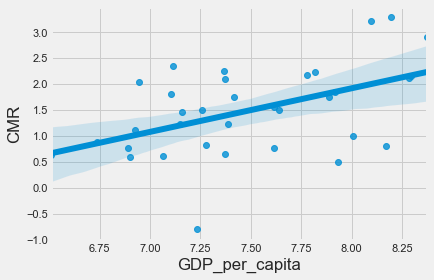

In [36]:
x = dfcovid['GDP_per_capita']
y = dfcovid['CMR']
sns.regplot(np.log(x), np.log(y))

This is a positive correlation, as the virus has affected states with more GDP per capita. We have Lagos & Abuja on the top. 


### Infection Rate vs Population density
#### Calculate the Infection rate

In [37]:
dfcovid['IFR'] = ((dfcovid['cases_lab_confirmed']/dfcovid['Population'])*1000000)

<AxesSubplot:xlabel='Population_density', ylabel='IFR'>

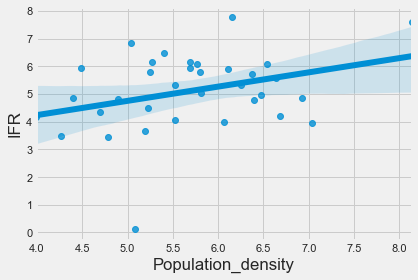

In [38]:
x = dfcovid['Population_density']
y = dfcovid['IFR']
sns.regplot(np.log(x), np.log(y))

The result above shows a positive correlation. For states with higher population density, we have more infection rate (confirmed cases per population)

### HIV cases vs Mortality rate
Are people with HIV more susceptible to severe covid cases ?

<AxesSubplot:xlabel='HIV_prevalence(%)', ylabel='CMR'>

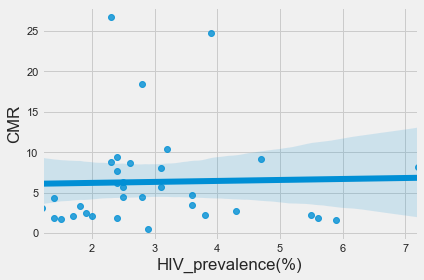

In [39]:
x = dfcovid['HIV_prevalence(%)']
y = dfcovid['CMR']
sns.regplot(x, y)

From the above, you can see little correlation between the Mortality rate and HIV prevalence figure. There are suggestions that the drug taken by the HIV patients might have a protective effect on COVID-19. Also there are suggestions that HIV patients are more cautious of the social distancing measures, as they are aware of the health risk factors. 

### More Analysis
From the examples above, your task is to determine relationship plots for different features that you think can affect the Covid cases 
<br>For example
<br>
* It was suggested that people who are older than 65 are more liable to die from covid, is this true here in Nigeria ?
<br>
### Task
* Your task here is to come up with questions and explore the correlations with the Covid datasets. 
* Support your findings with a detailed summary. Note that you can have negative correlations in some cases. 


### Impact on the Nigeria Economy
To understand the economic impact of Covid, you have to explore the provided budget data.  
<br>
### Task
* Determine the effect of the Pandemic on the economy. A way to do this is to explore the initial and the revised budget.  
* Generate a plot for your result

In [41]:
dfcovid['changes'] = abs(((dfcovid['Revised_budget (Bn)'] - dfcovid['Initial_budget (Bn)'])/dfcovid['Initial_budget (Bn)']))

In [42]:
dfcovid.head()

,states,cases_lab_confirmed,cases_on_admission,discharged,deaths,region,BCG Vaccination(%),Tuberculosis_cases,Smoking_prevalence(%),HIV_prevalence(%),...,Population,Population_density,Literacy_rate(%),Unemployment(%),GDP_per_capita,Initial_budget (Bn),Revised_budget (Bn),CMR,IFR,changes
0,Lagos,24952.0,1282.0,23439.0,231.0,South West,91.0,19933.0,19.6,2.8,...,12550598.0,3419.0,96.3,14.6,4333.0,1680.00,920.5,18.405497,1988.112439,0.452083
1,FCT,8424.0,1953.0,6383.0,88.0,North Central,63.0,966.0,5.1,3.9,...,3564126.0,469.0,78.8,24.4,3285.0,278.78,199.0,24.690485,2363.552804,0.286175
2,Plateau,3997.0,77.0,3886.0,34.0,North Central,62.0,2296.4,6.8,3.1,...,4200442.0,155.0,63.7,29.8,1587.0,177.30,122.0,8.094386,951.566526,0.311901
3,Kaduna,3867.0,491.0,3329.0,47.0,North West,46.0,2600.0,9.5,3.1,...,8252366.0,194.0,47.3,26.8,1666.0,259.25,223.6,5.695336,468.592886,0.137512
4,Oyo,3760.0,343.0,3372.0,45.0,South West,79.0,2296.4,23.7,2.5,...,7840864.0,296.0,80.3,10.3,2666.0,213.00,174.0,5.739163,479.538990,0.183099


In [52]:
dfgroup = dfcovid.groupby('region')['Initial_budget (Bn)', 'Revised_budget (Bn)', 'cases_lab_confirmed'].sum()

In [56]:
dfgroup['changes'] = abs(dfgroup['Revised_budget (Bn)'] - dfgroup['Initial_budget (Bn)'])

In [68]:
dfgroup

,Initial_budget (Bn),Revised_budget (Bn),cases_lab_confirmed,changes
region,,,,
North Central,1136.08,760.00,14465.0,376.08
North East,951.13,720.01,3268.0,231.12
North West,1385.07,1078.50,7638.0,306.57
South East,640.86,470.20,3678.0,170.66
South South,1526.08,1026.45,9247.0,499.63
South West,2774.80,1699.20,34148.0,1075.60


From the table, the south west region recorded the highest amount of confirmed cases, and also the highest amount of reduction in budget. This is because, the south west region experienced the longest duration of Lock-down, and as such was forced to shut down major economic activities. The effect is seen in budget reduction. 

Text(0.5, 0, 'Budget Reduction (Bn)')

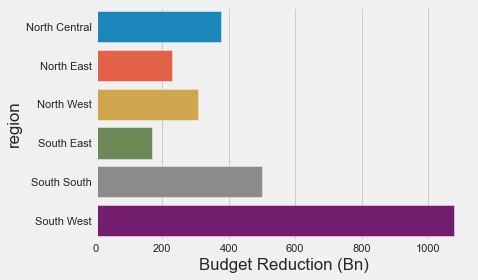

In [67]:
dfplot = dfgroup.reset_index()
y = dfplot['region']
ax = sns.barplot(x='changes', y=y, data=dfplot)
ax.set_xlabel('Budget Reduction (Bn)')

### Time series Analyis

### Task
* Show a line plot of the total daily cases in Nigeria
* Plot the daily infection rate in Nigeria
* Find the maximum infection rate, which is the peak value in the daily infection rate chart. 
* Determine the date in which the maximum infection rate was recorded, and the total number of cases. 

In [69]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

In [73]:
dfglobal_confirmed = pd.read_csv(url)

In [75]:
dfglobal_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,47072,47306,47516,47716,47851,48053,48116,48229,48527,48718
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,42148,42988,43683,44436,45188,46061,46863,47742,48530,49191
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,87502,88252,88825,89416,90014,90579,91121,91638,92102,92597
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,7005,7050,7084,7127,7162,7190,7236,7288,7338,7382
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,15536,15591,15648,15729,15804,15925,16061,16161,16188,16277


In [92]:
dfglobal_confirmed = dfglobal_confirmed.drop(['Province/State', 'Lat', 'Long'], axis=1)

In [93]:
dfglobal_confirmed.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,47072,47306,47516,47716,47851,48053,48116,48229,48527,48718
1,Albania,0,0,0,0,0,0,0,0,0,...,42148,42988,43683,44436,45188,46061,46863,47742,48530,49191
2,Algeria,0,0,0,0,0,0,0,0,0,...,87502,88252,88825,89416,90014,90579,91121,91638,92102,92597
3,Andorra,0,0,0,0,0,0,0,0,0,...,7005,7050,7084,7127,7162,7190,7236,7288,7338,7382
4,Angola,0,0,0,0,0,0,0,0,0,...,15536,15591,15648,15729,15804,15925,16061,16161,16188,16277


In [94]:
total_daily_nig = dfglobal_confirmed.groupby('Country/Region').sum().loc['Nigeria']

### Convert Series to dataframe

In [96]:
total_daily_nig2 = total_daily_nig.to_frame().reset_index()

In [101]:
total_daily_nig2.columns = ['Date', 'Cases']
total_daily_nig2['Date'] = pd.to_datetime(total_daily_nig2['Date'])
total_daily_nig2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    328 non-null    datetime64[ns]
 1   Cases   328 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.2 KB


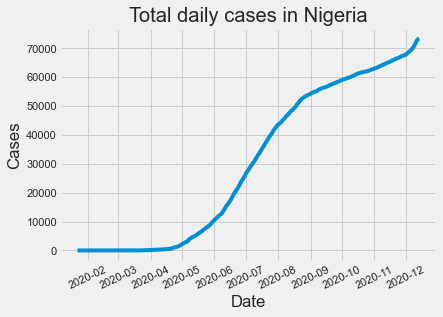

In [105]:
sns.lineplot(x="Date", y="Cases", data=total_daily_nig2)
plt.xticks(rotation=25)
plt.title('Total daily cases in Nigeria')
plt.show()

An upward trend of total daily cases in Nigeria

### Generate a plot of daily infection rate

To determine the daily infection rate, you can use the Pandas `diff` method to find the derivate of the total cases.

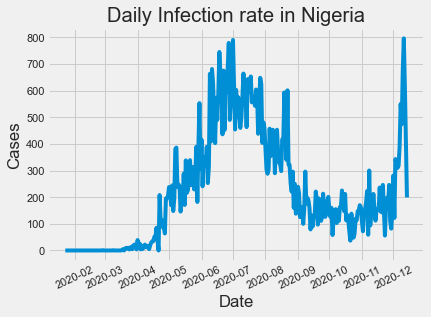

In [110]:
y = total_daily_nig2['Cases'].diff()
sns.lineplot(x="Date", y=y, data=total_daily_nig2)
plt.xticks(rotation=25)
plt.title('Daily Infection rate in Nigeria')
plt.show()

The maximum figure can be observed to be around December. The second wave of Covid is approaching. It is really important that people keep to preventive measures.

In [108]:
# Calculate maximum infection rate for a day
y.max()

796.0

In [115]:
total_daily_nig2['IFR'] = total_daily_nig2['Cases'].diff()

In [119]:
total_daily_nig2.loc[total_daily_nig2['IFR'] == y.max()]

,Date,Cases,IFR
324,2020-12-11,72140,796.0


The maximum infection rate was recorded on 11th of December, 2020. Meaning there were 796 new cases on that day. 
This result matches the NCDC figures on their official Twitter account. 